In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [107]:
citas_raw = pd.read_excel('C:/Users/Rafael Ortega/Proyectos/EDA-Bootcamp-Data-Science/src/data/raw/Citas de pacientes.xlsx')


c:\Users\Rafael Ortega\AppData\Local\Programs\Python\Python37\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [108]:
citas_raw.head()

,Año de la cita,Apellido Médico,Consulta estadistica,Consulta estadistica orden o efectivo,Consulta online,Consulta y practica estadistica,Consultas nuevas calculo,Deposito consulta,Deposito practica,Dia del Ciclo Monitoreo ecográfico,...,Repro Actuacion,Repro Filtro Ficha Control de Ciclo,Repro Número Episodio de Tratamiento,Sede,Tipo de cita,Tipo de citas estadistica,Tipo de Práctica,Validacion consulta obstetrica Carnet Prenatal,Valores de consultas y prácticas::Valor,Valores de consultas::Valor
0,2013.0,Ortega,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Ginecológica,Ginecológica,NaN,NaN,NaN,NaN
1,2013.0,Ortega,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Ginecológica,Ginecológica,NaN,NaN,NaN,NaN
2,2013.0,Ortega,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Suelo pélvico,Suelo pélvico,NaN,NaN,NaN,NaN
3,2013.0,Ortega,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Ginecológica,Ginecológica,NaN,NaN,NaN,NaN
4,2013.0,Ortega,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Suelo pélvico,Suelo pélvico,NaN,NaN,NaN,NaN


In [109]:
# Empiezo la limpieza del datafra original, enfocado en los tipos de cita y fechas de cita. 
citas_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8197 entries, 0 to 8196
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Año de la cita                                  8182 non-null   float64       
 1   Apellido Médico                                 8197 non-null   object        
 2   Consulta estadistica                            4799 non-null   float64       
 3   Consulta estadistica orden o efectivo           4862 non-null   float64       
 4   Consulta online                                 70 non-null     object        
 5   Consulta y practica estadistica                 1280 non-null   float64       
 6   Consultas nuevas calculo                        277 non-null    float64       
 7   Deposito consulta                               8 non-null      float64       
 8   Deposito practica                               

In [110]:
citas_raw.describe()

,Año de la cita,Consulta estadistica,Consulta estadistica orden o efectivo,Consulta y practica estadistica,Consultas nuevas calculo,Deposito consulta,Deposito practica,Dia del Ciclo Monitoreo ecográfico,DNI Paciente,Efectivo Consulta,...,Ordenes Farandato,Ordenes pendientes consulta,Ordenes pendientes práctica,Pago Pendiente consulta,Pago Pendiente Practica,Práctica estadistica,Recuento Consulta y Practica estadistica,Repro Número Episodio de Tratamiento,Valores de consultas y prácticas::Valor,Valores de consultas::Valor
count,8182.000000,4799.0,4862.0,1280.0,277.0,8.000000,9.000000,1.681000e+03,8.038000e+03,891.000000,...,88.0,126.000000,77.000000,47.000000,46.000000,1708.0,8197.0,1711.000000,643.000000,601.000000
mean,2018.743339,1.0,1.0,1.0,1.0,712.500000,2600.000000,1.078887e+05,3.144395e+07,616.285073,...,1.0,1.015873,1.012987,654.276596,1815.217391,1.0,1280.0,2.275278,5879.576874,2211.806988
std,2.393483,0.0,0.0,0.0,0.0,784.560842,2623.451924,1.272632e+06,9.989985e+06,592.092275,...,0.0,0.178174,0.113961,797.453030,2560.834707,0.0,0.0,1.547937,1424.136388,219.157879
min,2013.000000,1.0,1.0,1.0,1.0,100.000000,100.000000,1.000000e+00,3.350320e+05,0.000000,...,1.0,1.000000,1.000000,1.000000,0.000000,1.0,1280.0,1.000000,3315.000000,2028.000000
25%,2017.000000,1.0,1.0,1.0,1.0,275.000000,400.000000,5.000000e+00,2.786498e+07,200.000000,...,1.0,1.000000,1.000000,300.000000,425.000000,1.0,1280.0,1.000000,5401.000000,2028.000000
50%,2019.000000,1.0,1.0,1.0,1.0,400.000000,1200.000000,9.000000e+00,3.030930e+07,500.000000,...,1.0,1.000000,1.000000,500.000000,1000.000000,1.0,1280.0,2.000000,5463.030000,2028.000000
75%,2020.750000,1.0,1.0,1.0,1.0,850.000000,4000.000000,1.400000e+01,3.373402e+07,1000.000000,...,1.0,1.000000,1.000000,600.000000,2000.000000,1.0,1280.0,3.000000,6765.000000,2400.000000
max,2023.000000,1.0,1.0,1.0,1.0,2500.000000,7000.000000,1.511203e+07,9.559020e+07,4500.000000,...,1.0,3.000000,2.000000,5300.000000,15000.000000,1.0,1280.0,9.000000,13555.730000,2800.000000


In [111]:
# En la base de datos hay una columna "Tipo de cita estadistica", que agrupa los tipos de cita totales en 3 categorias: Ginecologicas, Obstetrica e Infertilidad. 
# Pero veo que ese trabajo no estuvo completo, hay mas de 3 tipos de citas. 
citas_raw['Tipo de citas estadistica'].unique()

array(['Ginecológica', 'Suelo pélvico', 'Ecografìa', 'Obstétrica',
       'Infertilidad', 'Burocrática', nan, 'Entrevista prenatal',
       'Infertilidad Resultado de Ciclo', 'No', 'Eco basal', 'MF - Eco 2',
       'MF - Eco 3', 'MF - Eco 4', 'Infertilidad - BHCG',
       'Encuentro Pre parto', 'Monitor Fetal', 'Infertilidad Estudios',
       'Monitor fetal', 'burocrática'], dtype=object)

In [112]:
citas_raw.columns

Index(['Año de la cita', 'Apellido Médico', 'Consulta estadistica',
       'Consulta estadistica orden o efectivo', 'Consulta online',
       'Consulta y practica estadistica', 'Consultas nuevas calculo',
       'Deposito consulta', 'Deposito practica',
       'Dia del Ciclo Monitoreo ecográfico', 'DNI Paciente', 'Duracion',
       'Efectivo Consulta', 'Efectivo Farandato', 'Efectivo Práctica',
       'Estado de cita', 'Fecha de Cita', 'Hora', 'ID Cita',
       'ID Cita recuento', 'ID Paciente', 'Informe de práctica',
       'Mes de la cita', 'Mes de la cita Recuento',
       'Nombre y Apellido Paciente', 'Numero de afiliado',
       'Numero de consultas nuevas sumario', 'Obra Social',
       'Obra Social En Cita Actual', 'Ordenes de consulta',
       'Ordenes de Práctica', 'Ordenes Farandato',
       'Ordenes pendientes consulta', 'Ordenes pendientes práctica',
       'Pago Pendiente consulta', 'Pago Pendiente Practica',
       'Persona que da la cita', 'Plan Obra Social', 'Práctica e

In [113]:
# Selecciona las columnas d einteres. 
# STEP 1

step1 = citas_raw[['ID Paciente',
                    'Fecha de Cita',
                    'Año de la cita',
                    'Mes de la cita', 
                    'Tipo de citas estadistica', 
                    'Consulta estadistica', 
                    'Práctica estadistica', 
                    'Consulta y practica estadistica']]

In [114]:
step1.head(25)

,ID Paciente,Fecha de Cita,Año de la cita,Mes de la cita,Tipo de citas estadistica,Consulta estadistica,Práctica estadistica,Consulta y practica estadistica
0,5.0,2013-06-25,2013.0,6.0,Ginecológica,1.0,NaN,NaN
1,6.0,2013-06-25,2013.0,6.0,Ginecológica,1.0,NaN,NaN
2,5.0,2013-07-01,2013.0,7.0,Suelo pélvico,1.0,NaN,NaN
3,7.0,2013-07-04,2013.0,7.0,Ginecológica,1.0,NaN,NaN
4,8.0,2013-07-08,2013.0,7.0,Suelo pélvico,1.0,NaN,NaN
5,9.0,2013-07-08,2013.0,7.0,Ginecológica,1.0,NaN,NaN
6,10.0,2013-07-23,2013.0,7.0,Ecografìa,NaN,NaN,NaN
7,8.0,2013-07-31,2013.0,7.0,Suelo pélvico,NaN,1.0,NaN
8,5.0,2013-08-06,2013.0,8.0,Suelo pélvico,1.0,NaN,NaN
9,13.0,2013-08-06,2013.0,8.0,Ecografìa,1.0,NaN,NaN


In [115]:
step1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8197 entries, 0 to 8196
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID Paciente                      8192 non-null   float64       
 1   Fecha de Cita                    8182 non-null   datetime64[ns]
 2   Año de la cita                   8182 non-null   float64       
 3   Mes de la cita                   8182 non-null   float64       
 4   Tipo de citas estadistica        6946 non-null   object        
 5   Consulta estadistica             4799 non-null   float64       
 6   Práctica estadistica             1708 non-null   float64       
 7   Consulta y practica estadistica  1280 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 512.4+ KB


In [116]:
#Vamos a poner nombres de columnas mas cortos
step2 = step1.rename(columns={'Consulta estadistica':'consultas',
                              'Práctica estadistica':'practicas',
                              'Tipo de citas estadistica':'tipo de citas',
                              'Mes de la cita': 'mes',
                              'Año de la cita': 'año',
                              'Fecha de Cita':'fecha cita', 
                              'Consulta y practica estadistica':'consulta AND practica'})

In [117]:
step2.head(1)

,ID Paciente,fecha cita,año,mes,tipo de citas,consultas,practicas,consulta AND practica
0,5.0,2013-06-25,2013.0,6.0,Ginecológica,1.0,NaN,NaN


In [118]:
step2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8197 entries, 0 to 8196
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID Paciente            8192 non-null   float64       
 1   fecha cita             8182 non-null   datetime64[ns]
 2   año                    8182 non-null   float64       
 3   mes                    8182 non-null   float64       
 4   tipo de citas          6946 non-null   object        
 5   consultas              4799 non-null   float64       
 6   practicas              1708 non-null   float64       
 7   consulta AND practica  1280 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 512.4+ KB


In [119]:
# Quitamos las filas que no tengan ID paciente, que no tengan fecha de cita y que no tengan definido el tipo de cita
# STEP 3

step3 = step2.dropna(subset=['ID Paciente', 'fecha cita','tipo de citas'])

In [120]:
step3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 8196
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID Paciente            6942 non-null   float64       
 1   fecha cita             6942 non-null   datetime64[ns]
 2   año                    6942 non-null   float64       
 3   mes                    6942 non-null   float64       
 4   tipo de citas          6942 non-null   object        
 5   consultas              4784 non-null   float64       
 6   practicas              1708 non-null   float64       
 7   consulta AND practica  1280 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 488.1+ KB


In [121]:
# Hay que trabajar mejor los criterios de consultas y practicas, para que el tipo de cita se base en citas reales, realizadas y facturadas. 
# A. consultas = acto medico en el que se realizó una consulta (incluye C)
# B .practicas = acto medico en el que se realizo una practica (incluye C)
# C .consulta AND practica = acto medico en el que se realizaron ambas (no incluye ni A ni B)
# Necesito crear D = (A+B)-C = Es decir, consultas OR practicas, no simultaneas, que no incluyan C

step3['consulta OR practica'] = ((step3['consultas'] != step3['consulta AND practica']) | (step3['practicas'] != step3['consulta AND practica'])).astype(int)


C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [122]:
step3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 8196
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID Paciente            6942 non-null   float64       
 1   fecha cita             6942 non-null   datetime64[ns]
 2   año                    6942 non-null   float64       
 3   mes                    6942 non-null   float64       
 4   tipo de citas          6942 non-null   object        
 5   consultas              4784 non-null   float64       
 6   practicas              1708 non-null   float64       
 7   consulta AND practica  1280 non-null   float64       
 8   consulta OR practica   6942 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(1), object(1)
memory usage: 515.2+ KB


In [123]:
step3.head()

,ID Paciente,fecha cita,año,mes,tipo de citas,consultas,practicas,consulta AND practica,consulta OR practica
0,5.0,2013-06-25,2013.0,6.0,Ginecológica,1.0,NaN,NaN,1
1,6.0,2013-06-25,2013.0,6.0,Ginecológica,1.0,NaN,NaN,1
2,5.0,2013-07-01,2013.0,7.0,Suelo pélvico,1.0,NaN,NaN,1
3,7.0,2013-07-04,2013.0,7.0,Ginecológica,1.0,NaN,NaN,1
4,8.0,2013-07-08,2013.0,7.0,Suelo pélvico,1.0,NaN,NaN,1


In [124]:
step3['tipo de citas'].unique()

array(['Ginecológica', 'Suelo pélvico', 'Ecografìa', 'Obstétrica',
       'Infertilidad', 'Burocrática', 'Entrevista prenatal',
       'Infertilidad Resultado de Ciclo', 'No', 'Eco basal', 'MF - Eco 2',
       'MF - Eco 3', 'MF - Eco 4', 'Infertilidad - BHCG',
       'Encuentro Pre parto', 'Monitor Fetal', 'Infertilidad Estudios',
       'Monitor fetal', 'burocrática'], dtype=object)

In [125]:
tipo_cita = step3['tipo de citas']

In [126]:
# Me doy cuenta que el 'tipo de citas estadistico' no es como yo pensaba, tiene que estar agrupado en 3 categorias, pero de la base de datos original se hizo de manera incompleta. 
# intentaremos completar la tarea a continuacion.
# Creamos un diccionario que asigna los valores existentes a los valores categorizados

dict_categorias = {
    'Ginecológica': 'Ginecologia',
    'Suelo pélvico': 'Ginecologia',
    'Ecografìa': 'Obstetricia',
    'Obstétrica': 'Obstetricia',
    'Infertilidad': 'Infertilidad',
    'Burocrática': 'Otro',
    'Entrevista prenatal': 'Obstetricia',
    'Infertilidad Resultado de Ciclo': 'Infertilidad',
    'No': 'Otro',
    'Eco basal': 'Obstetricia',
    'MF - Eco 2': 'Obstetricia',
    'MF - Eco 3': 'Obstetricia',
    'MF - Eco 4': 'Obstetricia',
    'Infertilidad - BHCG': 'Infertilidad',
    'Encuentro Pre parto': 'Obstetricia',
    'Monitor Fetal': 'Obstetricia',
    'Infertilidad Estudios': 'Infertilidad',
    'Monitor fetal': 'Obstetricia',
    'burocrática': 'Otro'
}


step3.loc[:,'tipo de citas'] = step3['tipo de citas'].replace(dict_categorias)



c:\Users\Rafael Ortega\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [127]:
step3.head()

,ID Paciente,fecha cita,año,mes,tipo de citas,consultas,practicas,consulta AND practica,consulta OR practica
0,5.0,2013-06-25,2013.0,6.0,Ginecologia,1.0,NaN,NaN,1
1,6.0,2013-06-25,2013.0,6.0,Ginecologia,1.0,NaN,NaN,1
2,5.0,2013-07-01,2013.0,7.0,Ginecologia,1.0,NaN,NaN,1
3,7.0,2013-07-04,2013.0,7.0,Ginecologia,1.0,NaN,NaN,1
4,8.0,2013-07-08,2013.0,7.0,Ginecologia,1.0,NaN,NaN,1


In [128]:
step3['tipo de citas'].unique()

array(['Ginecologia', 'Obstetricia', 'Infertilidad', 'Otro'], dtype=object)

In [129]:
step4 = step3.rename(columns={'tipo de citas':'tipo_cita_simple'})

In [130]:
step4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 8196
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID Paciente            6942 non-null   float64       
 1   fecha cita             6942 non-null   datetime64[ns]
 2   año                    6942 non-null   float64       
 3   mes                    6942 non-null   float64       
 4   tipo_cita_simple       6942 non-null   object        
 5   consultas              4784 non-null   float64       
 6   practicas              1708 non-null   float64       
 7   consulta AND practica  1280 non-null   float64       
 8   consulta OR practica   6942 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(1), object(1)
memory usage: 515.2+ KB


In [131]:
# Los NaN de consultas y de practicas deben valer 0. Es una codificacion binaria. 

step4['consultas'] = step4['consultas'].fillna(0)
step4['practicas'] = step4['practicas'].fillna(0)
step4['consulta AND practica'] = step4['consulta AND practica'].fillna(0)
step4['consulta OR practica'] = step4['consulta OR practica'].fillna(0)

In [132]:
step4.head()

,ID Paciente,fecha cita,año,mes,tipo_cita_simple,consultas,practicas,consulta AND practica,consulta OR practica
0,5.0,2013-06-25,2013.0,6.0,Ginecologia,1.0,0.0,0.0,1
1,6.0,2013-06-25,2013.0,6.0,Ginecologia,1.0,0.0,0.0,1
2,5.0,2013-07-01,2013.0,7.0,Ginecologia,1.0,0.0,0.0,1
3,7.0,2013-07-04,2013.0,7.0,Ginecologia,1.0,0.0,0.0,1
4,8.0,2013-07-08,2013.0,7.0,Ginecologia,1.0,0.0,0.0,1


In [133]:
step4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 8196
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID Paciente            6942 non-null   float64       
 1   fecha cita             6942 non-null   datetime64[ns]
 2   año                    6942 non-null   float64       
 3   mes                    6942 non-null   float64       
 4   tipo_cita_simple       6942 non-null   object        
 5   consultas              6942 non-null   float64       
 6   practicas              6942 non-null   float64       
 7   consulta AND practica  6942 non-null   float64       
 8   consulta OR practica   6942 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(1), object(1)
memory usage: 515.2+ KB


In [134]:
# Paso a integer las columnas float

step4[['ID Paciente', 'año', 'mes', 'consultas', 'practicas', 'consulta AND practica', 'consulta OR practica']] = step4[['ID Paciente', 'año', 'mes', 'consultas', 'practicas', 'consulta AND practica', 'consulta OR practica']].astype(int)

In [135]:
step4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6942 entries, 0 to 8196
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID Paciente            6942 non-null   int32         
 1   fecha cita             6942 non-null   datetime64[ns]
 2   año                    6942 non-null   int32         
 3   mes                    6942 non-null   int32         
 4   tipo_cita_simple       6942 non-null   object        
 5   consultas              6942 non-null   int32         
 6   practicas              6942 non-null   int32         
 7   consulta AND practica  6942 non-null   int32         
 8   consulta OR practica   6942 non-null   int32         
dtypes: datetime64[ns](1), int32(7), object(1)
memory usage: 352.5+ KB


In [199]:
# Ya lo tengo limpio.  Lo guardo como processed. Y desde alli sigo ya para los analisis

citas_processed = step4

citas_processed.to_csv('Citas - Processed.csv')

***Comenzamos el analisis. Lo primero es ver la distribucion del tipo de citas.***

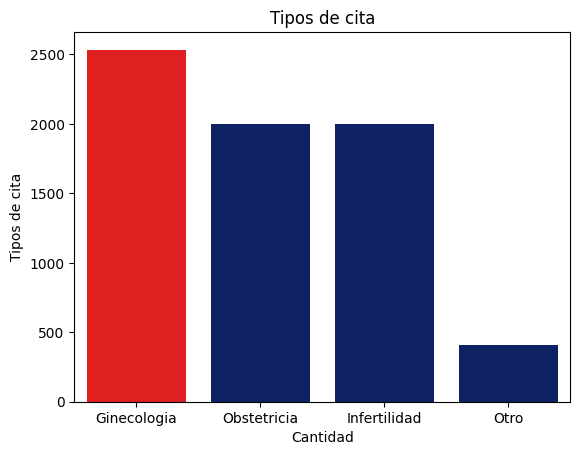

In [137]:
# Ver la distribucion del tipo de citas. 
colores = ['red', '#001970', '#001970', '#001970']

sns.countplot(x='tipo_cita_simple', data=step4, palette=colores)
plt.xlabel('Cantidad')
plt.ylabel('Tipos de cita')
plt.title('Tipos de cita')
plt.savefig('Distribucion por tipos de cita.png')

***Vemos el tipo de cita segun año***

In [138]:
step4.head()

,ID Paciente,fecha cita,año,mes,tipo_cita_simple,consultas,practicas,consulta AND practica,consulta OR practica
0,5,2013-06-25,2013,6,Ginecologia,1,0,0,1
1,6,2013-06-25,2013,6,Ginecologia,1,0,0,1
2,5,2013-07-01,2013,7,Ginecologia,1,0,0,1
3,7,2013-07-04,2013,7,Ginecologia,1,0,0,1
4,8,2013-07-08,2013,7,Ginecologia,1,0,0,1


In [139]:
step5 = step4.loc[:, ['tipo_cita_simple', 'año', 'ID Paciente']]
step5

,tipo_cita_simple,año,ID Paciente
0,Ginecologia,2013,5
1,Ginecologia,2013,6
2,Ginecologia,2013,5
3,Ginecologia,2013,7
4,Ginecologia,2013,8
...,...,...,...
8192,Obstetricia,2023,726
8193,Ginecologia,2023,832
8194,Otro,2023,912
8195,Otro,2023,53


In [140]:
# Le quito el año 2023 y el año 2013, que estan incompletos
# STEP 6
step6 = step5[(step5['año'] != 2013) & (step5['año'] != 2023)]

step6['año'].value_counts().sort_index()

2014     270
2015     506
2016     581
2017    1063
2018     759
2019     890
2020    1034
2021     696
2022     759
Name: año, dtype: int64

In [141]:
# Agrupamos por tipo de cita y año, para ver la frecuencia.
# STEP 7

step7 = step6.groupby(['tipo_cita_simple','año']).count()
step7

ID Paciente
tipo_cita_simple año              
Ginecologia      2014           97
                 2015          149
                 2016          184
                 2017          299
                 2018          203
                 2019          309
                 2020          369
                 2021          355
                 2022          378
Infertilidad     2014           97
                 2015          199
                 2016          241
                 2017          396
                 2018          217
                 2019          311
                 2020          240
                 2021           93
                 2022          143
Obstetricia      2014           63
                 2015          136
                 2016          131
                 2017          324
                 2018          277
                 2019          202
                 2020          346
                 2021          208
                 2022          200
Otro             2014           13
                 2015           22
                 2016           25
                 2017           44
                 2018           62
                 2019           68
                 2020           79
                 2021           40
                 2022           38

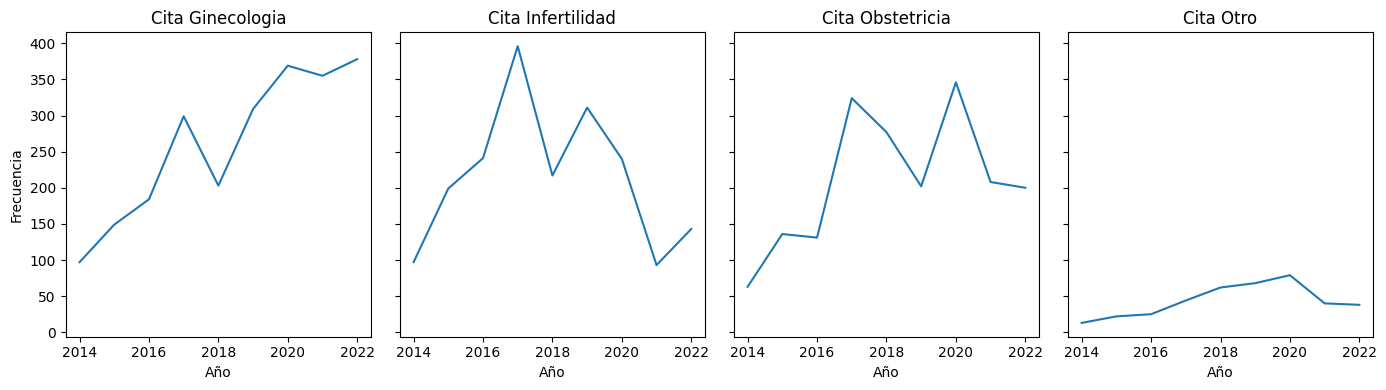

In [142]:
fig, axs = plt.subplots(1, 4, figsize=(14, 4), sharey=True)

for tipo, ax in zip(step7.index.get_level_values('tipo_cita_simple').unique(), axs.flatten()):
    sns.lineplot(data=step7.loc[step7.index.get_level_values('tipo_cita_simple') == tipo], x='año', y='ID Paciente', ax=ax)
    ax.set_title(f'Cita {tipo}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Frecuencia')

fig.tight_layout()
plt.show()

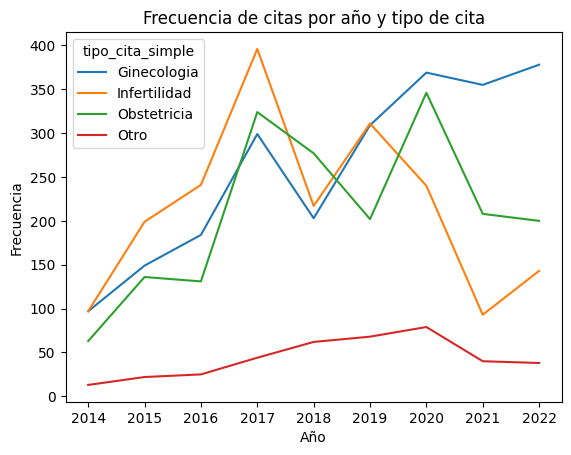

In [143]:
sns.lineplot(data=step7.reset_index(), x='año', y='ID Paciente', hue='tipo_cita_simple',  legend='auto')

# Añadir etiquetas y título
plt.title('Frecuencia de citas por año y tipo de cita')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


***Definir si existió segunda cita. Tasa de repeticion.***

In [144]:
step8 = citas_processed.groupby('ID Paciente').count()
step8.sort_values('fecha cita', ascending=False).head(20)

,fecha cita,año,mes,tipo_cita_simple,consultas,practicas,consulta AND practica,consulta OR practica
ID Paciente,,,,,,,,
112,98,98,98,98,98,98,98,98
129,98,98,98,98,98,98,98,98
354,77,77,77,77,77,77,77,77
268,72,72,72,72,72,72,72,72
113,71,71,71,71,71,71,71,71
317,69,69,69,69,69,69,69,69
279,63,63,63,63,63,63,63,63
290,61,61,61,61,61,61,61,61
15,61,61,61,61,61,61,61,61


In [145]:
rep_time = citas_processed.sort_values(by=['ID Paciente', 'fecha cita'], ascending=True)
rep_time

,ID Paciente,fecha cita,año,mes,tipo_cita_simple,consultas,practicas,consulta AND practica,consulta OR practica
604,3,2013-06-14,2013,6,Ginecologia,1,1,1,0
603,3,2013-08-01,2013,8,Ginecologia,1,0,0,1
602,3,2013-11-12,2013,11,Ginecologia,1,0,0,1
601,3,2013-12-19,2013,12,Ginecologia,1,0,0,1
600,3,2014-04-09,2014,4,Ginecologia,1,0,0,1
...,...,...,...,...,...,...,...,...,...
8176,972,2023-04-25,2023,4,Infertilidad,0,0,0,1
8189,973,2023-04-25,2023,4,Ginecologia,0,0,0,1
8190,974,2023-04-27,2023,4,Ginecologia,0,0,0,1
7363,11089393,2022-04-28,2022,4,Ginecologia,1,0,0,1


In [200]:
# Cada fecha tiene una cita. En las columnas pondremos los ID pacientes, y en el index las fechas. Cuando ese paciente hay realizado una cita, aparecera un 1. 
# STEP 9
step9 = citas_processed.pivot_table(index='fecha cita', columns='ID Paciente', values='consultas')
step9

ID Paciente,3,5,6,7,8,9,10,11,12,13,...,965,966,967,968,970,971,972,973,974,11089393
fecha cita,,,,,,,,,,,,,,,,,,,,,
2013-06-14,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-25,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-01,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-04,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-08,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [201]:
# HAgo una transposicion del describe, de esa manera puedo ver el recuento de citas de cada ID paciente, con la idea de descartar aquellas que muestran solo 1 cita. 
step10 = step9.describe().T
step10

,count,mean,std,min,25%,50%,75%,max
ID Paciente,,,,,,,,
3,46.0,0.869565,0.340503,0.0,1.00,1.0,1.00,1.0
5,6.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
6,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
7,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
8,3.0,0.666667,0.577350,0.0,0.50,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
971,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
972,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
973,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0


In [202]:
# De esta manera puedo obtener las pacientes que tuvieron 2 o mas citas, y descartar las de menos de 1 cita. 
# STEP 11

step11 = step10[step10['count'] >= 2 ].sort_values(by='count', ascending=False)
step11

,count,mean,std,min,25%,50%,75%,max
ID Paciente,,,,,,,,
112,96.0,0.760417,0.422892,0.0,0.875,1.0,1.00,1.0
129,93.0,0.761649,0.415867,0.0,0.500,1.0,1.00,1.0
354,76.0,0.644737,0.481773,0.0,0.000,1.0,1.00,1.0
113,71.0,0.577465,0.497479,0.0,0.000,1.0,1.00,1.0
317,68.0,0.779412,0.417726,0.0,1.000,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
284,2.0,1.000000,0.000000,1.0,1.000,1.0,1.00,1.0
135,2.0,0.500000,0.707107,0.0,0.250,0.5,0.75,1.0
271,2.0,1.000000,0.000000,1.0,1.000,1.0,1.00,1.0


In [203]:
# Me encontre con la dificultas de que considera los 0.0 como count, entonces hay ID pacientes que tiene 2 "citas", un 1 y un 0, en este caso la meda es 0.5. 
# Si filtro los ID pacientes que tienen mas de 0.5 de media, entonces me queda bien. 
# Seguramente si filtraba el dataframe antes me quedaba mejor, pero el resultado es el mismo. 
# STEP 12
step12 = step11[step11['mean'] > 0.5 ].sort_values(by='count', ascending=False)
step12

,count,mean,std,min,25%,50%,75%,max
ID Paciente,,,,,,,,
112,96.0,0.760417,0.422892,0.0,0.875,1.0,1.0,1.0
129,93.0,0.761649,0.415867,0.0,0.500,1.0,1.0,1.0
354,76.0,0.644737,0.481773,0.0,0.000,1.0,1.0,1.0
113,71.0,0.577465,0.497479,0.0,0.000,1.0,1.0,1.0
317,68.0,0.779412,0.417726,0.0,1.000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
913,2.0,1.000000,0.000000,1.0,1.000,1.0,1.0,1.0
356,2.0,1.000000,0.000000,1.0,1.000,1.0,1.0,1.0
932,2.0,1.000000,0.000000,1.0,1.000,1.0,1.0,1.0


In [151]:
# Voy comparando los subdataframes para verificar los pasos que voy haciendo
step11.shape

(548, 8)

In [152]:
step10.shape

(858, 8)

***En este paso puedo calcular la tasa de repeticion***

In [153]:
ratio_repitencia = step11.shape[0] / step10.shape[0]
ratio_repitencia

0.6386946386946387

***Lo siguiente es calcular el tiempo entre la primera y segunda cita***

In [154]:
# Ahora vamos a calcular el tiempo que pasa entre la primera y la segunda consulta.
rep_time = citas_processed.pivot_table(index='fecha cita', columns='ID Paciente', values='consultas')
rep_time

ID Paciente,3,5,6,7,8,9,10,11,12,13,...,965,966,967,968,970,971,972,973,974,11089393
fecha cita,,,,,,,,,,,,,,,,,,,,,
2013-06-14,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-25,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-01,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-04,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-08,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [155]:
# Paso los NaN a 0.0

rep_time.fillna(0.0, inplace=True)
rep_time

ID Paciente,3,5,6,7,8,9,10,11,12,13,...,965,966,967,968,970,971,972,973,974,11089393
fecha cita,,,,,,,,,,,,,,,,,,,,,
2013-06-14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-06-25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-08,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
# Otro tipo de mascara (mejorada) para quitar las pacientes que solo han consultado una sola vez.
a = rep_time.sum()
mask = a < 2.0
k = a[mask].astype(int)
k.astype('object')

cols_eliminar = list(k.index)

len(cols_eliminar)
rep_time.shape[1] - len(cols_eliminar)
print(a)
print(cols_eliminar)

ID Paciente
3           40.0
5            6.0
6            1.0
7            1.0
8            2.0
            ... 
971          0.0
972          0.0
973          0.0
974          0.0
11089393     1.0
Length: 858, dtype: float64
[6, 7, 10, 11, 13, 21, 22, 26, 31, 32, 33, 35, 39, 41, 43, 44, 46, 49, 50, 51, 54, 58, 59, 62, 64, 65, 67, 68, 69, 72, 75, 77, 88, 89, 91, 92, 93, 94, 97, 99, 101, 102, 103, 108, 109, 115, 116, 117, 118, 119, 123, 124, 125, 135, 137, 138, 148, 149, 151, 152, 153, 155, 157, 158, 160, 162, 163, 164, 168, 171, 172, 174, 177, 178, 179, 182, 183, 185, 186, 193, 194, 195, 198, 199, 203, 212, 214, 216, 217, 219, 226, 227, 228, 229, 231, 238, 239, 241, 242, 243, 248, 249, 250, 251, 252, 254, 257, 259, 262, 263, 266, 272, 273, 277, 281, 283, 288, 289, 292, 293, 294, 298, 301, 305, 311, 315, 321, 322, 323, 324, 326, 327, 329, 330, 346, 349, 351, 364, 368, 378, 386, 387, 388, 389, 392, 394, 395, 396, 405, 406, 407, 408, 418, 422, 423, 428, 429, 436, 437, 449, 450, 451, 453,

In [157]:
rep_time.columns

Int64Index([       3,        5,        6,        7,        8,        9,
                  10,       11,       12,       13,
            ...
                 965,      966,      967,      968,      970,      971,
                 972,      973,      974, 11089393],
           dtype='int64', name='ID Paciente', length=858)

In [158]:
step13 = rep_time.drop(labels=cols_eliminar, axis=1)

In [159]:
step13.shape

(1638, 447)

In [160]:
step13

ID Paciente,3,5,8,9,12,14,15,16,17,18,...,932,934,937,943,944,947,949,951,952,953
fecha cita,,,,,,,,,,,,,,,,,,,,,
2013-06-14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-06-25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-08,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2023-04-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
#Comprobacion haciendo slicing de que tengo los datos que quiero 
step13.iloc[:,1]

fecha cita
2013-06-14    0.0
2013-06-25    1.0
2013-07-01    1.0
2013-07-04    0.0
2013-07-08    0.0
             ... 
2023-04-13    0.0
2023-04-18    0.0
2023-04-20    0.0
2023-04-25    0.0
2023-04-27    0.0
Name: 5, Length: 1638, dtype: float64

In [162]:
# x = step13.iloc[:,855][step13.iloc[:,855] != 0].dropna()
# # j = x.index[1] - x.index[0]
# # j.days
# x.shape[0]

In [163]:
# TODAS ESTAS SON VERIFICACIONES, hasta el bucle for... 
#Intento sacar del ID Paciente 3, las fechas de cita en una columna sin NaN. Asi despues resto el segundo al primero y me quedan los dias que tardó en volver.
step12 = step13.iloc[:,0].dropna().sort_index(ascending=True)



In [164]:
import datetime as dt

In [165]:
step12

fecha cita
2013-06-14    1.0
2013-06-25    0.0
2013-07-01    0.0
2013-07-04    0.0
2013-07-08    0.0
             ... 
2023-04-13    0.0
2023-04-18    0.0
2023-04-20    0.0
2023-04-25    0.0
2023-04-27    0.0
Name: 3, Length: 1638, dtype: float64

In [166]:
step12.index[0]

Timestamp('2013-06-14 00:00:00')

In [167]:
tiempo_seg_cita = (step12.index[1] - step12.index[0])
tiempo_seg_cita

Timedelta('11 days 00:00:00')

In [168]:
tiempo_seg_cita.days

11

In [169]:
len(step13.columns)

447

In [170]:
# con este bucle repaso las columnas una por una, obtengo los valores = 1, elimino los NaN. 
# Si hay 2 valores de 1 o mas, obtengo LA diferencia entre el primero y el segundo index (fechas)
# Y los guardo en una lista.

days_lst = []

for values in range(0,len(step13.columns)):
    x = step13.iloc[:,values][step13.iloc[:,values] != 0].dropna()
    if x.sum() >= 2:
        j = x.index[1] - x.index[0]
        days_lst.append(j.days)

print(len(days_lst))
print(len(rep_time.columns))
days_lst
    

447
858


[48,
 6,
 38,
 92,
 55,
 35,
 35,
 70,
 16,
 44,
 29,
 14,
 254,
 62,
 525,
 27,
 99,
 757,
 24,
 30,
 16,
 97,
 19,
 25,
 14,
 13,
 651,
 1,
 715,
 66,
 50,
 36,
 14,
 19,
 56,
 41,
 47,
 23,
 322,
 49,
 7,
 14,
 5,
 27,
 21,
 7,
 189,
 7,
 7,
 8,
 21,
 131,
 14,
 227,
 52,
 5,
 42,
 21,
 7,
 77,
 33,
 154,
 45,
 45,
 63,
 14,
 1113,
 28,
 112,
 7,
 14,
 4,
 14,
 756,
 259,
 14,
 659,
 54,
 28,
 77,
 115,
 168,
 11,
 7,
 35,
 7,
 34,
 271,
 107,
 35,
 24,
 16,
 685,
 28,
 42,
 9,
 16,
 2349,
 39,
 5,
 3,
 49,
 17,
 418,
 21,
 371,
 7,
 6,
 22,
 19,
 14,
 52,
 28,
 11,
 44,
 532,
 5,
 2060,
 315,
 1,
 28,
 19,
 60,
 28,
 6,
 28,
 65,
 91,
 8,
 42,
 35,
 28,
 52,
 7,
 21,
 5,
 14,
 254,
 16,
 16,
 19,
 28,
 42,
 37,
 190,
 12,
 35,
 26,
 238,
 9,
 9,
 14,
 5,
 63,
 21,
 9,
 14,
 50,
 650,
 9,
 1,
 7,
 14,
 32,
 14,
 1345,
 18,
 42,
 42,
 15,
 556,
 14,
 39,
 27,
 11,
 27,
 5,
 21,
 83,
 16,
 16,
 7,
 26,
 39,
 7,
 62,
 12,
 6,
 30,
 21,
 257,
 203,
 27,
 41,
 8,
 14,
 61,
 21,
 28,
 13,

In [171]:
dias_1er_2da_cita = pd.DataFrame(days_lst)
dias_1er_2da_cita

,0
0,48
1,6
2,38
3,92
4,55
...,...
442,28
443,28
444,56
445,5


In [172]:
days_gap = dias_1er_2da_cita.reset_index()

In [173]:
days_gap.rename(columns={'index':'Observacion', 0:'Frecuencia'}, inplace=True)

In [174]:
days_gap[['Frecuencia']].describe()

,Frecuencia
count,447.000000
mean,90.006711
std,221.394930
min,1.000000
25%,14.000000
50%,27.000000
75%,58.000000
max,2349.000000


In [175]:
# Intento quitar los 20 mayores para ver si el grafico sale mejor
days_gap2 = days_gap[['Frecuencia']].sort_values(by= 'Frecuencia', ascending=False)
days_gap3 = days_gap2.iloc[20:]
days_gap3.head()
days_gap4 = days_gap3.reset_index()
days_gap4.head()

,index,Frecuencia
0,103,418
1,240,378
2,105,371
3,377,354
4,233,340


In [176]:
#days_gap5 = days_gap4.rename(columns={'index':'Observacion'})

Text(0, 0.5, 'Observaciones')

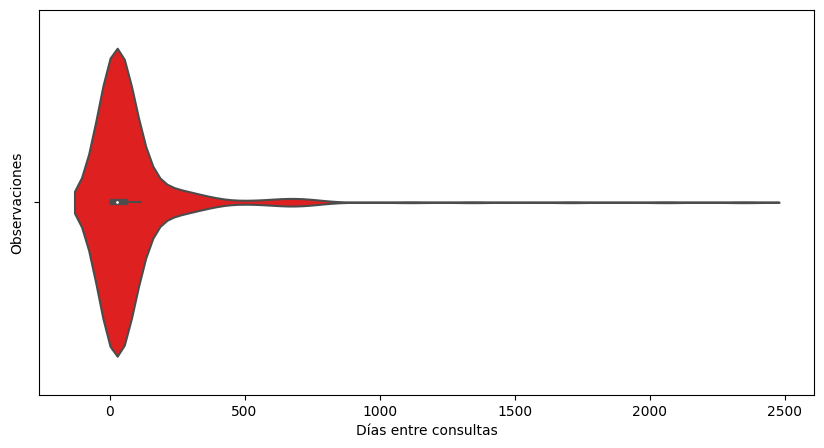

In [177]:
plt.figure(figsize=(10,5))
sns.violinplot( x = 'Frecuencia', data=days_gap, orient = 'h', color='red');
plt.xlabel('Días entre consultas')
plt.ylabel('Observaciones')

In [178]:
days_gap.describe().T

,count,mean,std,min,25%,50%,75%,max
Observacion,447.0,223.000000,129.182042,0.0,111.5,223.0,334.5,446.0
Frecuencia,447.0,90.006711,221.394930,1.0,14.0,27.0,58.0,2349.0


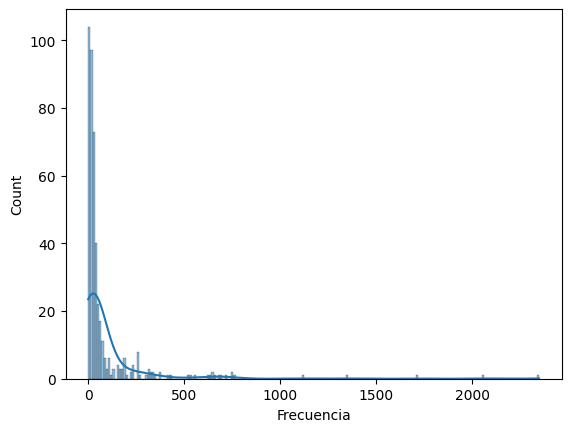

In [179]:
sns.histplot(days_gap, x='Frecuencia', kde=True);

In [180]:
days_gap6 = days_gap.set_index('Observacion')
days_gap6.head(2)

,Frecuencia
Observacion,
0,48
1,6


In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML



In [182]:
step14 = step7.reset_index()
step14.head(5)

,tipo_cita_simple,año,ID Paciente
0,Ginecologia,2014,97
1,Ginecologia,2015,149
2,Ginecologia,2016,184
3,Ginecologia,2017,299
4,Ginecologia,2018,203


In [183]:
step14.rename(columns={'ID Paciente': 'Cantidad', 'tipo_cita_simple': 'Tipo de cita', 'año':'Año'}, inplace=True)

In [184]:
grupo = pd.Series(['Tipo de consulta'] * len(step14))
step14 = pd.concat([step14, grupo], axis=1)



In [185]:
step14.columns

Index(['Tipo de cita', 'Año', 'Cantidad', 0], dtype='object')

In [186]:
step15 = step14.rename(columns={0:'Grupo'})

In [187]:

step15.rename(columns={'Tipo de cita': 'name', 'Grupo': 'group', 'Año':'year', 'Cantidad':'value'}, inplace=True)

In [188]:
step16 = step15.reindex(columns=['name', 'group','year', 'value'])

In [189]:
step16.head(10)

,name,group,year,value
0,Ginecologia,Tipo de consulta,2014,97
1,Ginecologia,Tipo de consulta,2015,149
2,Ginecologia,Tipo de consulta,2016,184
3,Ginecologia,Tipo de consulta,2017,299
4,Ginecologia,Tipo de consulta,2018,203
5,Ginecologia,Tipo de consulta,2019,309
6,Ginecologia,Tipo de consulta,2020,369
7,Ginecologia,Tipo de consulta,2021,355
8,Ginecologia,Tipo de consulta,2022,378
9,Infertilidad,Tipo de consulta,2014,97


In [190]:
step16['group'] = step16['name']

In [191]:
step16.head()

,name,group,year,value
0,Ginecologia,Ginecologia,2014,97
1,Ginecologia,Ginecologia,2015,149
2,Ginecologia,Ginecologia,2016,184
3,Ginecologia,Ginecologia,2017,299
4,Ginecologia,Ginecologia,2018,203
